# PN2V Training
Here we will use the generated noise model and train a PN2V network on single noisy images.
Please run the 'Convallaria-1-CreateNoiseModel' notebook first.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from unet.model import UNet

from pn2v import utils
from pn2v import histNoiseModel
from pn2v import training
from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Load Data

In [2]:
path='data/Convallaria_diaphragm/'

# Load the training data
data=imread(path+'20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif')

In [3]:
# We are loading the histogram from the 'Convallaria-1-CreateNoiseModel' notebook
histogram=np.load(path+'noiseModel.npy')

# Create a NoiseModel object from the histogram.
noiseModel=histNoiseModel.NoiseModel(histogram, device=device)

### Create the Network and Train it
This can take a while.

In [4]:
# Create a network with 800 output channels that are interpreted as samples from the prior.
net = UNet(800, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix='conv', directory=path, noiseModel=noiseModel,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=5, virtualBatchSize=20, batchSize=1, learningRate=1e-3)

/home/krull/projects/pn2vCheck/pn2v/unet/model.py:215: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  init.xavier_normal(m.weight)
/home/krull/projects/pn2vCheck/pn2v/unet/model.py:216: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias, 0)


Epoch 0 finished      
avg. loss: 4.156826460361481+-(2SEM)0.15659984271763067      
Epoch 1 finished      
avg. loss: 3.62296324968338+-(2SEM)0.12760123552894934      
Epoch 2 finished      
avg. loss: 3.4781370520591737+-(2SEM)0.14745237926871882      
Epoch 3 finished      
avg. loss: 3.4105971693992614+-(2SEM)0.12464374541352688      
Epoch 4 finished      
avg. loss: 3.254356253147125+-(2SEM)0.12532008581808968      
Epoch 5 finished      
avg. loss: 3.17391699552536+-(2SEM)0.0840362488195318      
Epoch 6 finished      
avg. loss: 3.0668845057487486+-(2SEM)0.11054898889767367      
Epoch 7 finished      
avg. loss: 3.105911147594452+-(2SEM)0.08978339047132528      
Epoch 8 finished      
avg. loss: 2.9760555028915405+-(2SEM)0.06819042784388601      
Epoch 9 finished      
avg. loss: 2.9532453179359437+-(2SEM)0.10193504336700644      
Epoch 10 finished      
avg. loss: 3.0427741169929505+-(2SEM)0.09530536229391177      
Epoch 11 finished      
avg. loss: 3.0136954188346863+-(2SEM)

Epoch 93 finished      
avg. loss: 2.9261518478393556+-(2SEM)0.10763948305833412      
Epoch 94 finished      
avg. loss: 3.043550157546997+-(2SEM)0.06792376107664827      
Epoch 95 finished      
avg. loss: 2.9856864333152773+-(2SEM)0.08885542673055416      
Epoch 96 finished      
avg. loss: 3.0621127843856812+-(2SEM)0.0931768881494728      
Epoch    96: reducing learning rate of group 0 to 6.2500e-05.
Epoch 97 finished      
avg. loss: 2.993631100654602+-(2SEM)0.13410365414696782      
Epoch 98 finished      
avg. loss: 2.9205014228820803+-(2SEM)0.07906696784432787      
Epoch 99 finished      
avg. loss: 2.937788712978363+-(2SEM)0.11577439580086649      
Epoch 100 finished      
avg. loss: 3.018564963340759+-(2SEM)0.0875968819305307      
Epoch 101 finished      
avg. loss: 2.9524072647094726+-(2SEM)0.0960319263809357      
Epoch 102 finished      
avg. loss: 3.00581476688385+-(2SEM)0.10104776392304701      
Epoch 103 finished      
avg. loss: 2.907485854625702+-(2SEM)0.08529049891

avg. loss: 2.981892478466034+-(2SEM)0.09656677775039794      
Epoch 182 finished      
avg. loss: 2.975202751159668+-(2SEM)0.10433446156717091      
Epoch 183 finished      
avg. loss: 2.964029812812805+-(2SEM)0.09767023688650979      
Epoch 184 finished      
avg. loss: 2.968989813327789+-(2SEM)0.08920278770262621      
Epoch   184: reducing learning rate of group 0 to 2.4414e-07.
Epoch 185 finished      
avg. loss: 2.960061287879944+-(2SEM)0.10885264360600114      
Epoch 186 finished      
avg. loss: 2.933567500114441+-(2SEM)0.09079351139613671      
Epoch 187 finished      
avg. loss: 2.9550893306732178+-(2SEM)0.1460621835056585      
Epoch 188 finished      
avg. loss: 2.951492166519165+-(2SEM)0.07072696064448335      
Epoch 189 finished      
avg. loss: 2.9576616644859315+-(2SEM)0.0778162112109729      
Epoch 190 finished      
avg. loss: 3.045444643497467+-(2SEM)0.08975535182771298      
Epoch 191 finished      
avg. loss: 3.0614062905311585+-(2SEM)0.10799103276364043      
Epoch

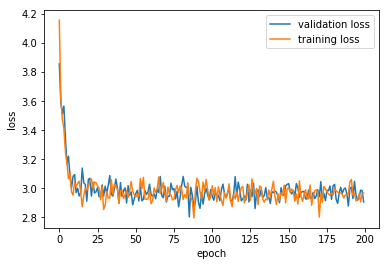

In [6]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()